# NASA Exoplanet Data Exploration

This notebook analyzes our cleaned dataset of potentially habitable exoplanets, focusing on their key characteristics and habitability scores.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

In [3]:
# Load the cleaned dataset
df = pd.read_csv('../../data_science/datasets/nasa_clean.csv')
print(f"Number of planets in cleaned dataset: {len(df)}")
df.head()

Number of planets in cleaned dataset: 46


,pl_name,pl_rade,pl_masse,pl_eqt,st_teff,sy_dist,pl_orbper,pl_orbsmax,st_mass,st_rad,st_age,habitability_score,high_interest_target
0,"""K2-3 c""",1.582,2.68,371.8,3844.0,44.0727,24.646729,0.1357,0.549,0.546,6.9,0.065332,0
1,"""K2-3 c""",1.850,NaN,344.0,3896.0,44.0727,24.643540,0.1399,0.600,0.560,NaN,0.069882,0
2,"""K2-3 c""",1.690,3.30,381.0,3835.0,44.0727,24.646582,0.1414,0.620,0.600,1.0,0.000000,0
3,"""K2-3 c""",1.560,NaN,374.0,3951.0,44.0727,24.647450,0.1345,0.530,0.520,NaN,0.073988,0
4,"""K2-3 d""",1.620,1.60,312.0,3835.0,44.0727,44.556456,0.2097,0.620,0.600,1.0,0.334989,0


## Key Statistics

Let's examine the distribution of key planetary characteristics.

In [4]:
# Basic statistics
print("Statistical Summary:")
df.describe()

Statistical Summary:


,pl_rade,pl_masse,pl_eqt,st_teff,sy_dist,pl_orbper,pl_orbsmax,st_mass,st_rad,st_age,habitability_score,high_interest_target
count,46.000000,13.000000,46.000000,46.000000,46.000000,46.000000,34.000000,35.000000,46.000000,11.000000,46.000000,46.0
mean,1.772266,6.251538,304.933696,3798.113043,51.365759,35.408730,0.152615,0.485154,0.490470,3.193636,0.173204,0.0
std,0.378675,4.697208,56.839573,466.722312,21.852509,18.346980,0.053621,0.150937,0.143839,2.548852,0.194909,0.0
min,0.949186,1.600000,157.090000,2988.000000,14.986100,20.523000,0.087500,0.146000,0.186000,0.830000,0.000000,0.0
25%,1.512500,2.680000,269.600000,3482.000000,39.754975,24.669822,0.127700,0.414000,0.419457,1.000000,0.000000,0.0
50%,1.728500,6.380000,308.600000,3835.000000,45.080900,27.584345,0.136650,0.520000,0.501500,1.500000,0.085474,0.0
75%,2.090000,7.400000,346.500000,3899.000000,66.862400,36.865174,0.163825,0.590000,0.575000,5.000000,0.321554,0.0
max,2.474000,19.500000,389.000000,5391.000000,118.318000,84.839600,0.340500,0.740000,0.791370,6.900000,0.661153,0.0


## Habitability Score Distribution

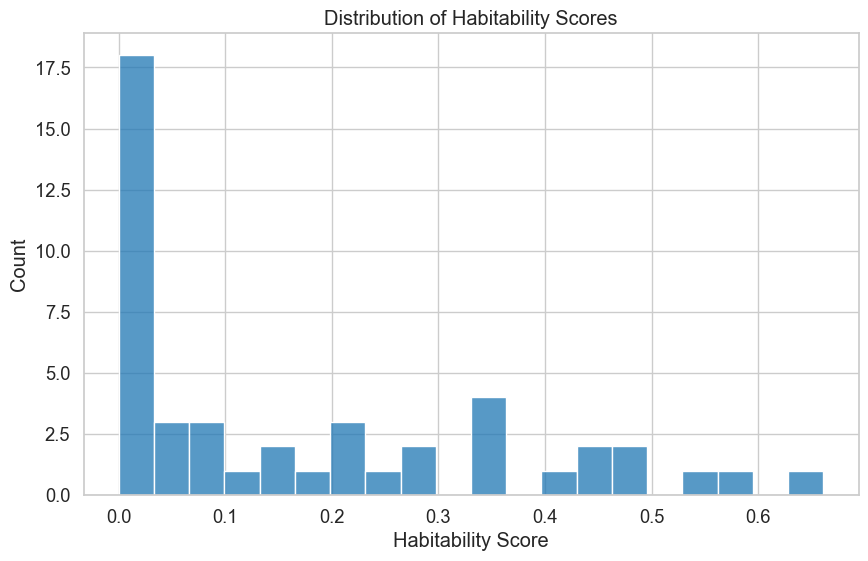

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='habitability_score', bins=20)
plt.title('Distribution of Habitability Scores')
plt.xlabel('Habitability Score')
plt.ylabel('Count')
plt.show()

## Planet Characteristics

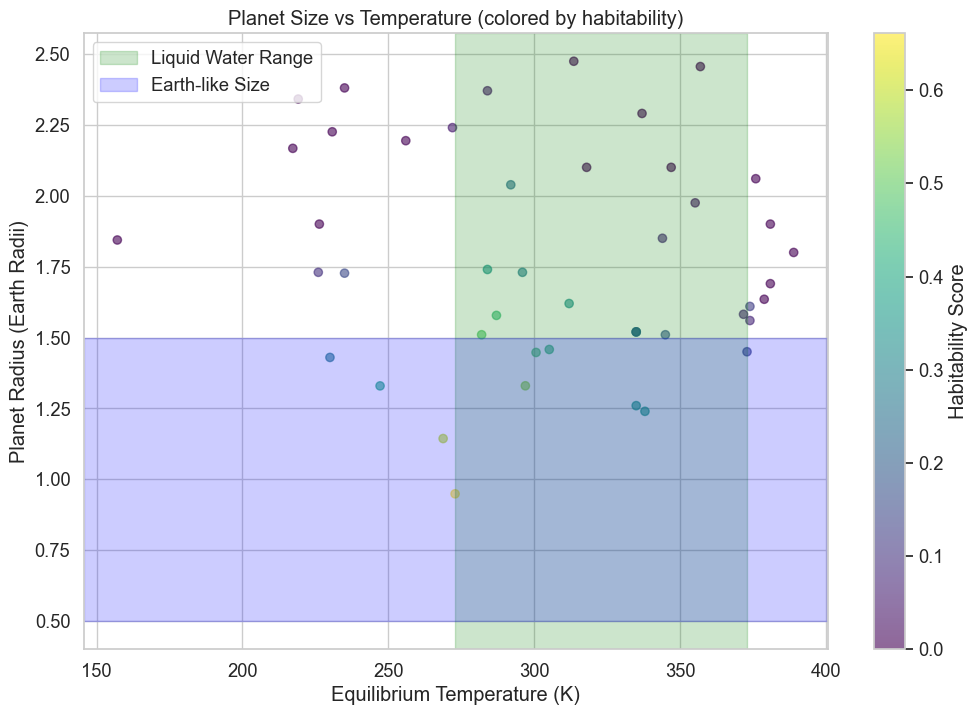

In [6]:
# Create a scatter plot of planet size vs equilibrium temperature
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['pl_eqt'], df['pl_rade'], 
                     c=df['habitability_score'], 
                     cmap='viridis', 
                     alpha=0.6)
plt.colorbar(scatter, label='Habitability Score')
plt.xlabel('Equilibrium Temperature (K)')
plt.ylabel('Planet Radius (Earth Radii)')
plt.title('Planet Size vs Temperature (colored by habitability)')

# Add Earth-like region
plt.axvspan(273, 373, alpha=0.2, color='green', label='Liquid Water Range')
plt.axhspan(0.5, 1.5, alpha=0.2, color='blue', label='Earth-like Size')
plt.legend()
plt.show()

## Top Candidates

Let's identify and examine the most promising candidates for habitability.

In [7]:
# Sort by habitability score and show top 10
top_candidates = df.sort_values('habitability_score', ascending=False).head(10)
print("Top 10 Most Promising Candidates:")
top_candidates[['pl_name', 'pl_rade', 'pl_eqt', 'st_teff', 'sy_dist', 'habitability_score']]

Top 10 Most Promising Candidates:


,pl_name,pl_rade,pl_eqt,st_teff,sy_dist,habitability_score
30,"""TOI-700 e""",0.949186,272.90,3482.0,31.1265,0.661153
24,"""TOI-700 d""",1.144000,268.80,3461.0,31.1265,0.593092
36,"""TOI-2095 c""",1.330000,297.00,3759.0,41.9176,0.550983
5,"""K2-3 d""",1.510000,282.00,3896.0,44.0727,0.481818
37,"""TOI-2095 c""",1.447525,300.66,3746.0,41.9176,0.473503
6,"""K2-3 d""",1.458000,305.20,3844.0,44.0727,0.449590
27,"""TOI-2285 b""",1.578114,287.08,3546.0,42.4090,0.448516
23,"""TOI-700 d""",1.329657,247.18,3482.0,31.1265,0.397280
42,"""Kepler-138 d""",1.260000,335.00,3841.0,66.8624,0.358584
39,"""Kepler-138 d""",1.240000,338.00,3846.0,66.8624,0.354456


## Distance Distribution

Let's look at how far these potentially habitable planets are from Earth.

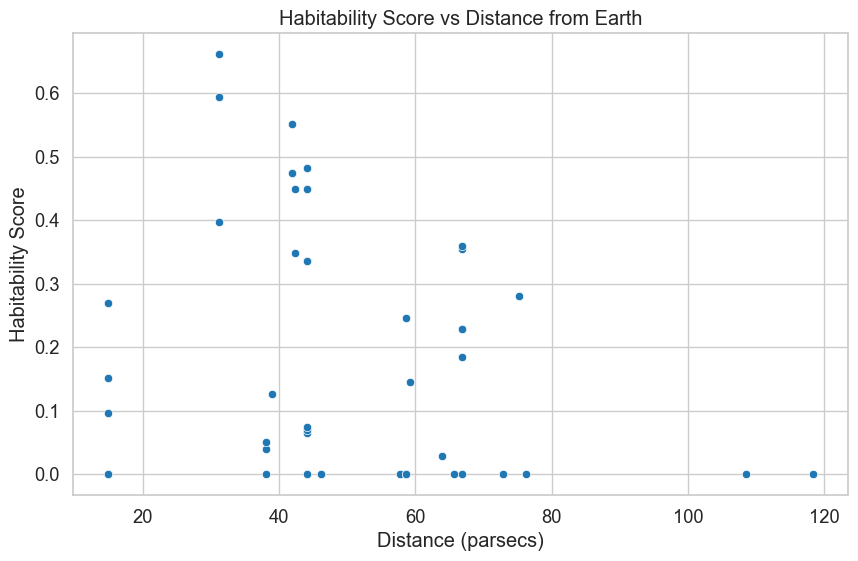

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sy_dist', y='habitability_score')
plt.title('Habitability Score vs Distance from Earth')
plt.xlabel('Distance (parsecs)')
plt.ylabel('Habitability Score')
plt.show()